##  Project 2, Part 2: Web Scraped Data Analysis and Visualizations

**Name: Denilson Wilson Aguilar Molina**

**Date: 04/02/2024**

In [180]:
#importing packages
import requests as r
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Grabbing the URL of the Wikipedia page
response = r.get("https://en.wikipedia.org/wiki/List_of_Netflix_original_films_(since_2024)#Feature_films")

# The Converts It Into Text
wiki_text =response.text

# This the html content
soup = BeautifulSoup(wiki_text, 'html.parser')

# This finds the table containg the film data
table_soup = soup.find_all('table')
filtered_table_soup = [table for table in table_soup if table.caption is not None]

required_table = None


# This uses Freature films 2024 to find the table.
for table in filtered_table_soup:
    if str(table.caption.string).strip() == 'Feature films 2024':
        required_table = table
        break
        
# This looks for the headers of the rows since they start with th
header_tags = required_table.find_all('th')
headers = [header.text.strip() for header in header_tags]
print(headers) #This would print the headers of the rows

# This extracts the data rows
rows =[]

#This searches for all tr of the table
data_rows = required_table.find_all('tr')

#This displays the extracted rows from the site
for row in data_rows[1:]:
    value = row.find_all('td')
    beautified_value = [dp.text.strip() for dp in value]
    print(beautified_value)
    

['Title', 'Genre', 'Premiere', 'Runtime', 'Language', 'Awaiting release']
['Society of the Snow', 'Disaster', 'January 4, 2024', '2 h 25 min', 'Spanish']
['Good Grief', 'Romantic comedy', 'January 5, 2024', '1 h 40 min', 'English']
['Lift', 'Action comedy-thriller', 'January 12, 2024', '1 h 46 min', 'English']
['From the Ashes', 'Drama', 'January 18, 2024', '1 h 32 min', 'Arabic']
['Sixty Minutes', 'Action', 'January 19, 2024', '1 h 29 min', 'German']
['The Kitchen', 'Science fiction drama', 'January 19, 2024', '1 h 48 min', 'English']
['Badland Hunters', 'Dystopian action', 'January 26, 2024', '1 h 48 min', 'Korean']
['Orion and the Dark', 'CG animation', 'February 2, 2024', '1 h 32 min', 'English']
['Ashes', 'Drama', 'February 9, 2024', '1 h 40 min', 'Turkish']
['Bhakshak', 'Drama', 'February 9, 2024', '2 h 14 min', 'Hindi']
['Kill Me If You Dare', 'Comedy', 'February 13, 2024', '1 h 34 min', 'Polish']
['Players', 'Romantic comedy', 'February 14, 2024', '1 h 45 min', 'English']
['Sow

The question I'm going to answer using the gathered data is "What are the most common genres for Netflix films?" I'll be making this into a top 10 list to simplify it, overall this should be an interesting discovery.

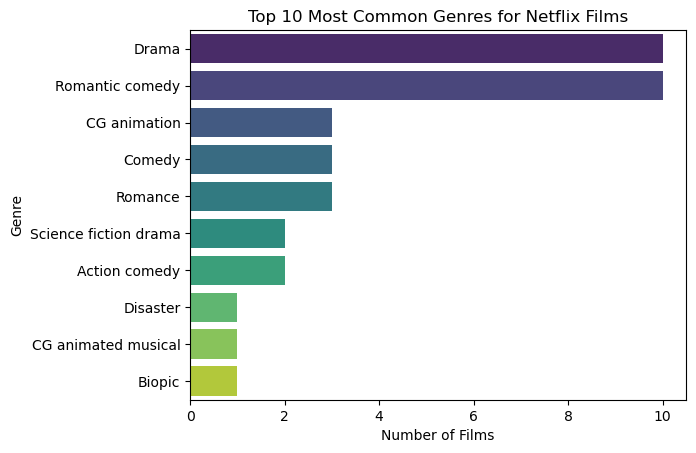

In [187]:
# What are the most common genres for Netflix films?
top_genres = df["Genre"].value_counts().head(10)#organzies theme by Genre
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis") #This uses a different palette color using sns
plt.xlabel("Number of Films") 
plt.ylabel("Genre")
plt.title("Top 10 Most Common Genres for Netflix Films")
plt.show()


It appears that Drama  and Romantic comedys are the most common genres for Netflix films, while CG Comedy, Romance, etc are on the lower end as they don't seemingly have the same appeal as the other ones on the platform.

Here I'm answering the question, "What are the most common genres for Netflix films?" I'll be using a graph to display the top 5 most common language for Netflix films


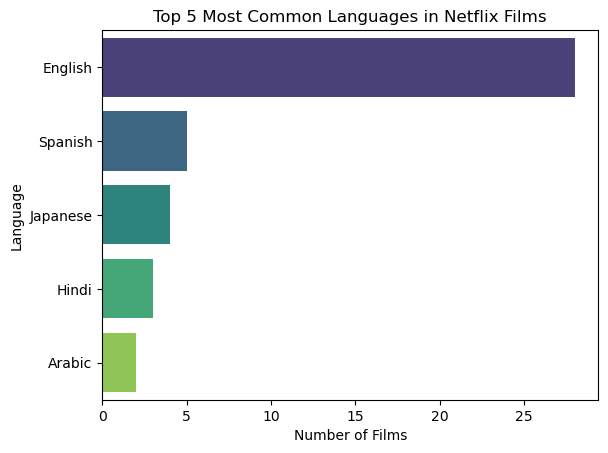

In [185]:
# What are the top 5 languages most commonly used in Netflix films?
top_languages = df["Language"].value_counts().head(5) #This grabs the lanuages and makes it to be the top 5 that are diaplayed
sns.barplot(x=top_languages.values, y=top_languages.index, palette="viridis") #use sns to change the color of the graph to be more appealing
plt.xlabel("Number of Films") #This gathers the overall amount of films
plt.ylabel("Language") 
plt.title("Top 5 Most Common Languages in Netflix Films")
plt.show()

It appears that the most common language is English for Netflix films, followed by Spanish, Japanese, Hindi, and Arabic, It's not too surpising to see English being the most common one among them but the other languages are pretty interesting as it is a primarly english platform

The question I'm going to be answering here is "How has the number of Netflix films released each month changed over time?
" This should help us deteremine if the number of films increases or decrease for Netflix as of recent.

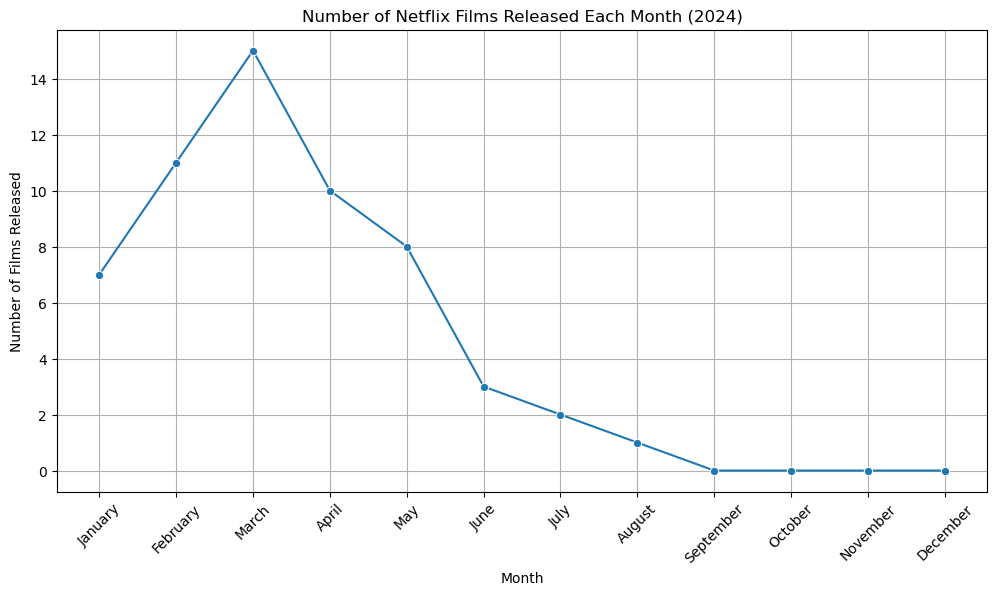

In [198]:
# I'm defining the order of the months here since I ran into an issue in which it was all scrambled 
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# This helps to convert the 'Month' column to categorical with the correct order
df['Month'] = pd.Categorical(df['Month'], categories=months_order, ordered=True)

#How has the number of Netflix films released each month changed over time?
monthly_counts = df['Month'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Films Released')
plt.title('Number of Netflix Films Released Each Month (2024)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

It appears that the month with the most films releaseed on Netflix was March, it started with a slow incline from January to March, though it does appear that there won't be many films coming to the platform anytime in the future, then again this can change at anytime.

The question being answered here is "What are the top 5 Netflix films with the longest runtime?" I'll be using the runtime for the films to determine the answer for this one.

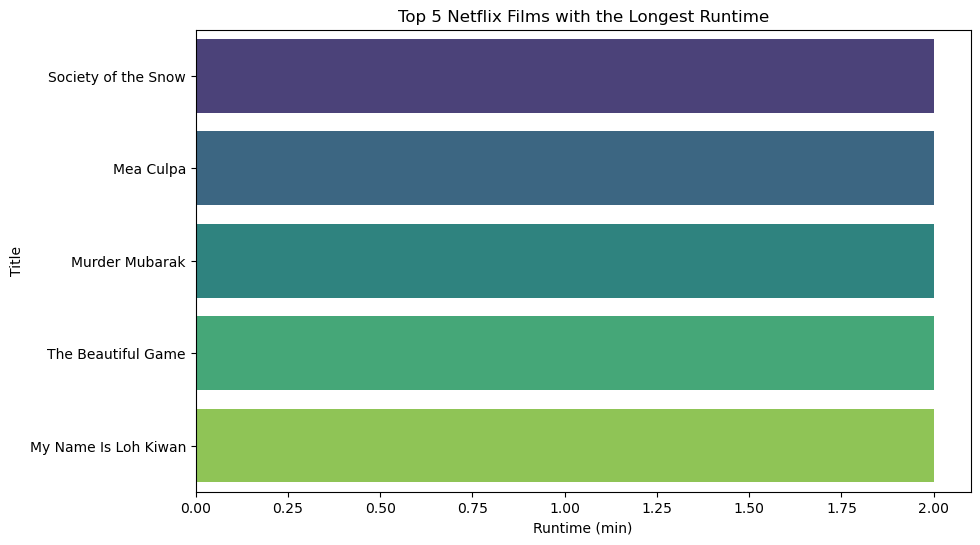

Top 5 Netflix films with the longest runtime:
                   Title     Runtime
0    Society of the Snow  2 h 25 min
14             Mea Culpa         2 h
24        Murder Mubarak  2 h 21 min
31    The Beautiful Game   2 h 5 min
18  My Name Is Loh Kiwan  2 h 13 min


In [204]:
#What are the top 5 Netflix films with the longest runtime?
top_longest_films = df.sort_values(by='Runtime (min)', ascending=False).head(5)

#I create a simple graph which only displays the top 5 longest running films to appear on, it doesn't exactly display the actual amount since i'd probably would need to do more just to make it work,
plt.figure(figsize=(10, 6))
sns.barplot(x='Runtime (min)', y='Title', data=top_longest_films, palette='viridis', order=top_longest_films['Title'])
plt.xlabel('Runtime (min)')
plt.ylabel('Title')
plt.title('Top 5 Netflix Films with the Longest Runtime')
plt.show()

# This only prints/displays the length of each of the films, this was on the simplier side to create.
top_longest_films = df.sort_values(by='Runtime (min)', ascending=False).head(5)
print("Top 5 Netflix films with the longest runtime:")
print(top_longest_films[['Title', 'Runtime']])

It appears that Society of the Snow is the longest running film as of recent on Netflix, followed by Murder Mubarak, My Name Is Loh Kiwan, The Beautiful Game, and Mae Culpa

This was just a random additonal one I included just for testing out a differnt type of plotting, this is not part of the 4 main questions i went out to answer, the question being asnwer is "Does Lnauage and genre have anything to do with the films?"

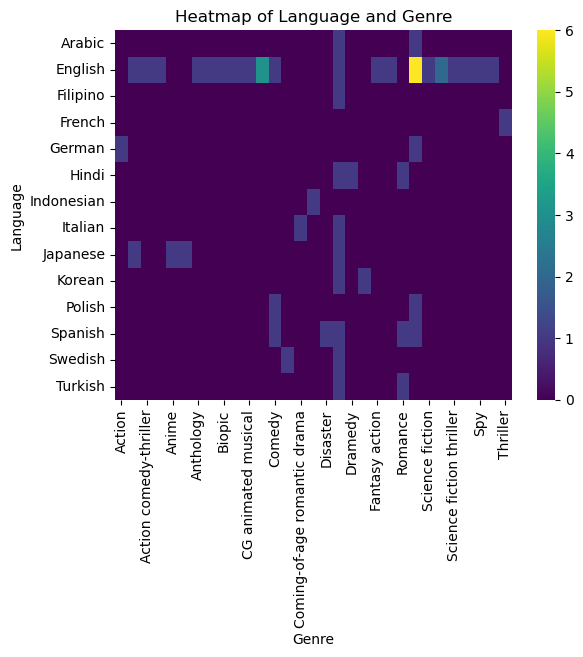

In [205]:
# Does language and genre have anything to do with films?
language_genre_cross = df.groupby(["Language", "Genre"]).size().unstack(fill_value=0)
sns.heatmap(language_genre_cross, cmap="viridis")
plt.xlabel("Genre")
plt.ylabel("Language")
plt.title("Heatmap of Language and Genre")
plt.show()

It appears that for the most part genre and films do not relate to each other as much as I previosuly thought, though it does appear that English and Romance films go in and hand as they do appear to have a close relatiionship